# Домашнее задание 1, Лупашин Евгений, БПМИ184

In [1]:
! pip install sweetviz

import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
from PIL import Image

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('HW1_var_19.csv', delimiter=';')
df = df.drop(columns=['Номер варианта'])
df.head()

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000019,Форма банка (без печати работодателя),Ремонт,1.000,0.180,мужской,1.000,0,высшее,специалист,< 50,0.000,70.000,31.000,Финансы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000039,NaN,Покупка автомобиля,0.000,NaN,мужской,0.000,0,Высшее/Второе высшее/Ученая степень,другое,NaN,0.000,53.000,26.000,Финансы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000059,Форма банка (без печати работодателя),Ремонт,1.000,0.490,женский,0.000,0,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,>250,0.000,16.000,29.000,Торговля,ООО,женат / замужем,1.000,1.000,1.000,0.000,0.000,0.156,1.000,0.000,0.000,0.000,0.750,3.000,1.000,81.000,4.000,1.000,0.000,26.000,52.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1000079,Поступление зарплаты на счет,Ремонт,1.000,0.540,женский,0.000,0,высшее,специалист,>250,0.000,13.000,43.000,Другое,ООО,холост / не замужем,0.000,0.000,0.000,0.000,0.000,0.025,0.000,0.000,0.000,0.000,0.400,2.000,3.000,79.000,5.000,0.000,0.000,18.000,76.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
4,1000099,Свободная форма с печатью работодателя,Ремонт,1.000,0.310,мужской,0.000,0,высшее,менеджер высшего звена,>250,0.000,53.000,52.000,Производство,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> ## Часть 1.1 - Исследуем распределение по данным

In [3]:
display(df.shape)

(10242, 43)

In [4]:
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
ID,10242.000,1102429.000,59135.101,1000019.000,1051224.000,1102429.000,1153634.000,1204839.000
INSURANCE_FLAG,10241.000,0.606,0.489,0.000,0.000,1.000,1.000,1.000
DTI,10136.000,0.387,0.138,0.010,0.280,0.410,0.490,0.630
FULL_AGE_CHILD_NUMBER,10240.000,0.556,0.762,0.000,0.000,0.000,1.000,5.000
DEPENDANT_NUMBER,10242.000,0.005,0.090,0.000,0.000,0.000,0.000,3.000
BANKACCOUNT_FLAG,7909.000,0.385,0.868,0.000,0.000,0.000,0.000,4.000
Period_at_work,7909.000,65.956,65.962,5.000,20.000,44.000,86.000,481.000
age,7909.000,36.277,8.673,23.000,29.000,35.000,42.000,62.000
max90days,3964.000,1.576,1.833,0.000,0.000,1.000,2.000,23.000
max60days,3964.000,1.121,1.530,0.000,0.000,1.000,1.000,22.000


Можем автоматизированно сгенерировать вот такой красивый отчётик по данным:

In [5]:
df_num = df.copy()
df_num.SEX = df_num.SEX.apply(lambda x: 1 if x == 'мужской' else 0)
report = sv.analyze(df_num, 'SEX')
report.show_html('report.html')

                                             |                                             | [  0%]   00:00 ->…

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Но там есть не вся требуемая информация, например, процент уникальных значений и процент нулей придется посчитать вручную:

In [6]:
stats = df.agg(
    [
        (lambda x: x.nunique() / len(x) * 100),
        (lambda x: x.isin([0]).sum() / len(x) * 100),
        (lambda x: x.isna().sum() / len(x) * 100),
        
    ]
).transpose()
stats.columns = [
    'Процент уникальных значений',
    'Процент нулевых значений',
    'Процент пропущенных значений',
]
display(stats)

,Процент уникальных значений,Процент нулевых значений,Процент пропущенных значений
ID,100.000,0.000,0.000
INCOME_BASE_TYPE,0.039,0.000,0.713
CREDIT_PURPOSE,0.098,0.000,0.000
INSURANCE_FLAG,0.020,39.416,0.010
DTI,0.586,0.000,1.035
SEX,0.020,0.000,0.000
FULL_AGE_CHILD_NUMBER,0.059,59.285,0.020
DEPENDANT_NUMBER,0.039,99.649,0.000
EDUCATION,0.088,0.000,0.010
EMPL_TYPE,0.088,0.000,0.098


Суммируя всё, что получили выше, можно отметить следующее:
1) Все ID пользователей уникальные, поэтому каждую строку можно считать отдельным клиентом, не прибегая к аггрегации информации о человеке по таблице

2) Довольно много категориальных признаков (будем считать таковыми все, у которых процент уникальных значений менее 0.5%)

3) Несколько признаков с одинаковым и относительно небольшим числом пропущенных значений, пока не понятно, с чем это связано, но запомним это:

![](Screenshot_1.jpg)

4) Есть столбцы с очень большим числом нулевых значений (больше 1/3): INSURANCE_FLAG, FULL_AGE_CHILD_NUMBER, DEPENDANT_NUMBER. Если посмотреть на описания признаков, становится ясно, что это не ошибка, а просто особенность данных признаков

5) Есть столбцы, у которых суммарная доля пропущенных и нулевых значений составляет более 75%: thirty_in_a_year, sixty_in_a_year, ninety_in_a_year, thirty_vintage, sixty_vintage, ninety_vintage, num_AccountActive180, num_AccountActive90, num_AccountActive60, if_zalog. Вероятно, пропущены значения у людей, которым отказали в кредите, так как в столбце all_credits доля пропущенных значений составляет ~60%, как и в этих признаках, а нулевые значения тут тоже вероятно не являются выбросами или ошибкой

6) Есть столбцы, в которых много (больше 1/2) нулевых значений: EMPL_FORM, FAMILY_STATUS, max90days, max60days, max30days, max21days, max14days, avg_num_delay, Active_to_All_prc, numAccountActiveAll, numAccountClosed, sum_of_paym_months, all_credits, Active_not_cc, own_closed, min_MnthAfterLoan, max_MnthAfterLoan, dlq_exist. Вполне возможно это тоже связано с отказом в кредите, так как во всех столбцах доля нулей похожа на долю в all_credits

7) Больше половины клиентов работают на текущей работе меньше 100 дней (столбец Period_at_work)

Выделим категориальные признаки по предложенному выше условия и нарисуем какие-нибудь диаграммы, которые дадут лучшее представление о данных:

In [7]:
categorical = df.columns[stats['Процент уникальных значений'] < 0.5].values
print(categorical)

['INCOME_BASE_TYPE' 'CREDIT_PURPOSE' 'INSURANCE_FLAG' 'SEX'
 'FULL_AGE_CHILD_NUMBER' 'DEPENDANT_NUMBER' 'EDUCATION' 'EMPL_TYPE'
 'EMPL_SIZE' 'BANKACCOUNT_FLAG' 'age' 'EMPL_PROPERTY' 'EMPL_FORM'
 'FAMILY_STATUS' 'max90days' 'max60days' 'max30days' 'max21days'
 'max14days' 'if_zalog' 'num_AccountActive180' 'num_AccountActive90'
 'num_AccountActive60' 'numAccountActiveAll' 'numAccountClosed'
 'all_credits' 'Active_not_cc' 'own_closed' 'dlq_exist' 'thirty_in_a_year'
 'sixty_in_a_year' 'ninety_in_a_year' 'thirty_vintage' 'sixty_vintage'
 'ninety_vintage']


Например, посмотрим на распределение семейного положения в зависимости от возраста:

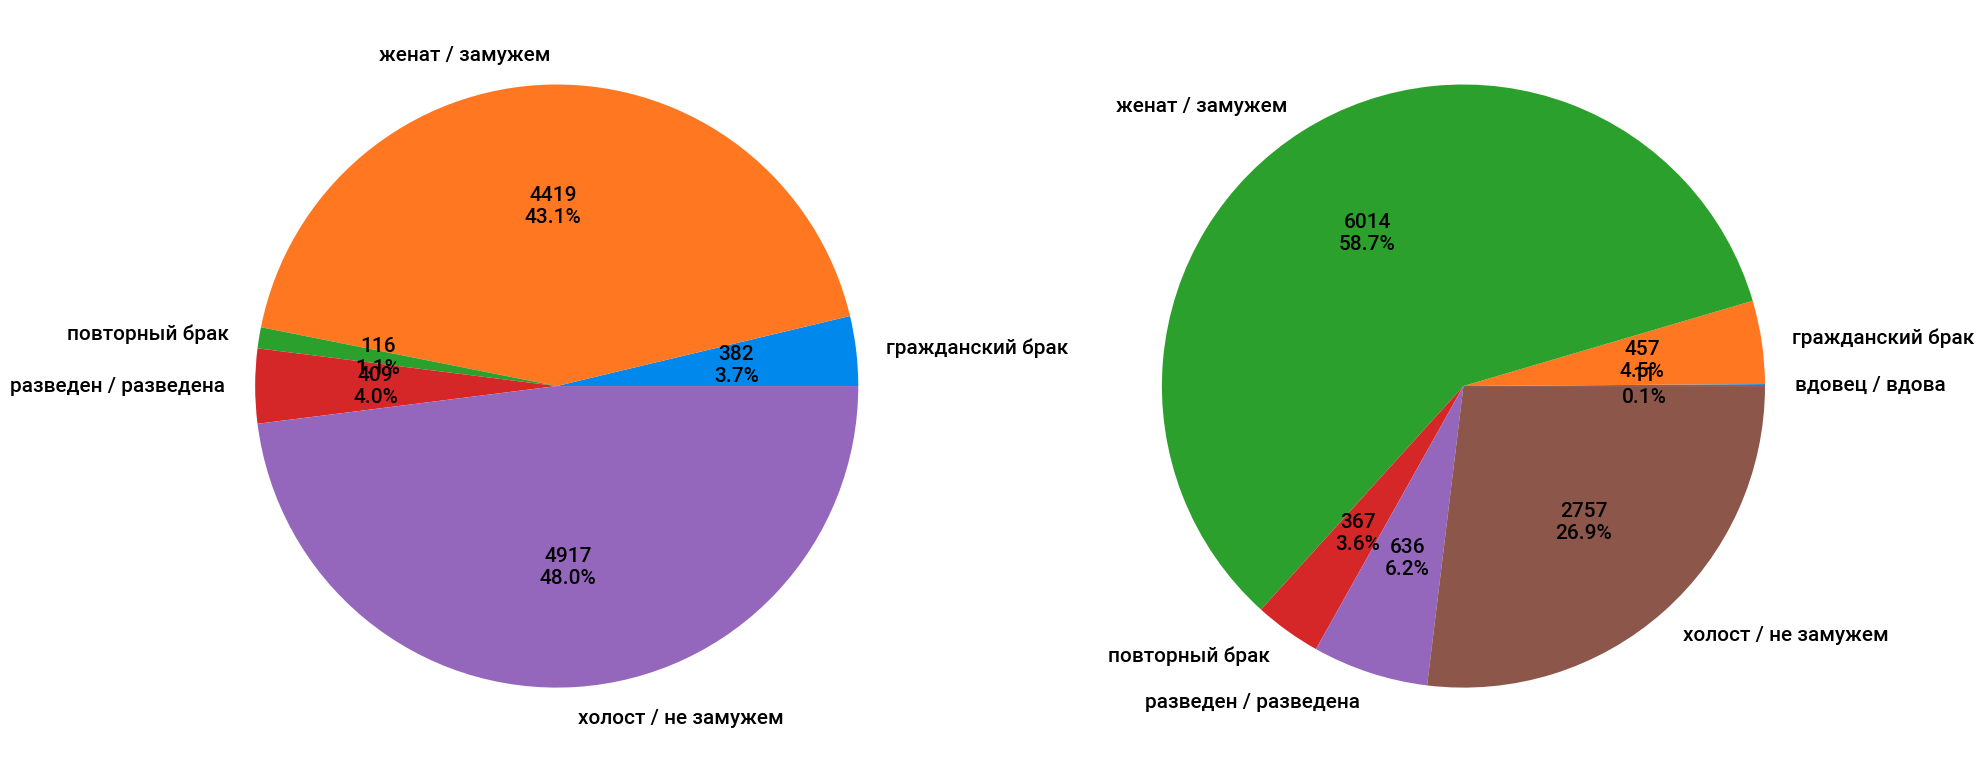

In [8]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.1f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

df[df.age < 30].groupby('FAMILY_STATUS').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15}, ax=ax1,
                                                    startangle=0)
df[df.age >= 30].groupby('FAMILY_STATUS').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15}, ax=ax2,
                                                    startangle=0)

ax1.set_ylabel('')
ax2.set_ylabel('')
plt.tight_layout()

Вполне ожидаемо, что среди молодых клиентов доля замужних сильно ниже, а холостых сильно выше, чем среди клиентов старше 30 лет. Но не забываем, что мы не знаем про семейное положение более чем половины клиентов. Добиться простыми способами одинаковых цветов для одинаковых значений у меня не вышло, но в целом и так не сложно соотности доли на разных диаграммах. Теперь можем посмотреть на распределение заработной планы у клиентов:

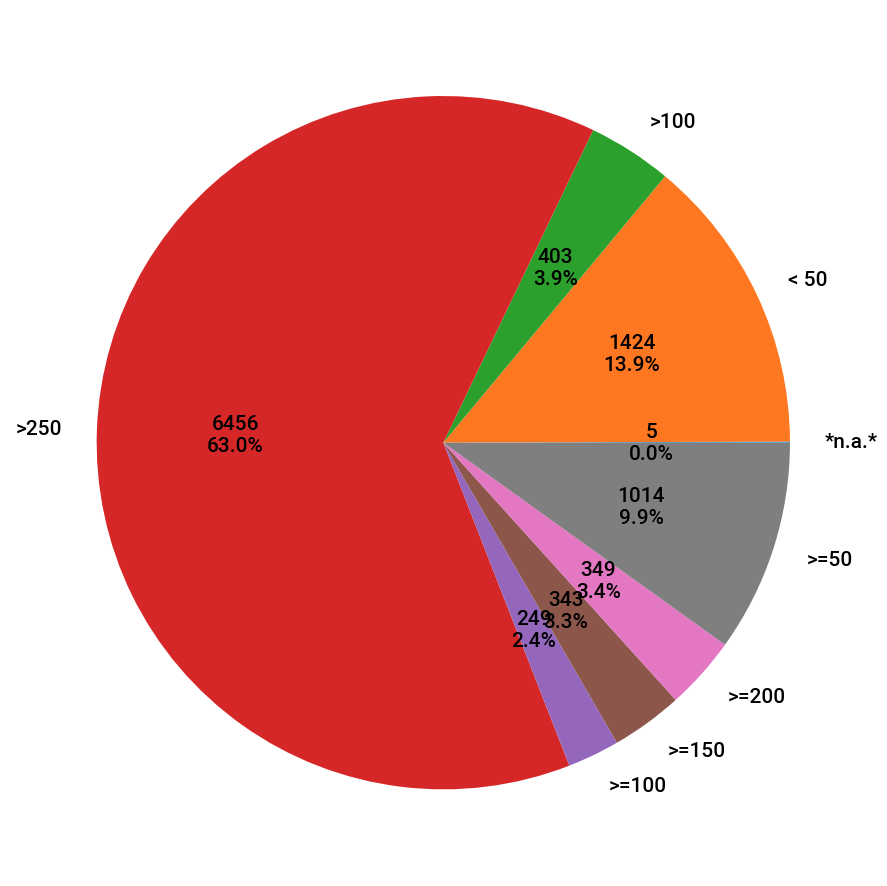

In [9]:
plt.figure(figsize=(9, 9))
df.groupby('EMPL_SIZE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15}, startangle=0)
plt.ylabel('')
plt.tight_layout()

Что ж, если это зп в месяц в тысячах рублей, а не что-то иное, то значит наш средний клиент относится к верхушке среднего класса

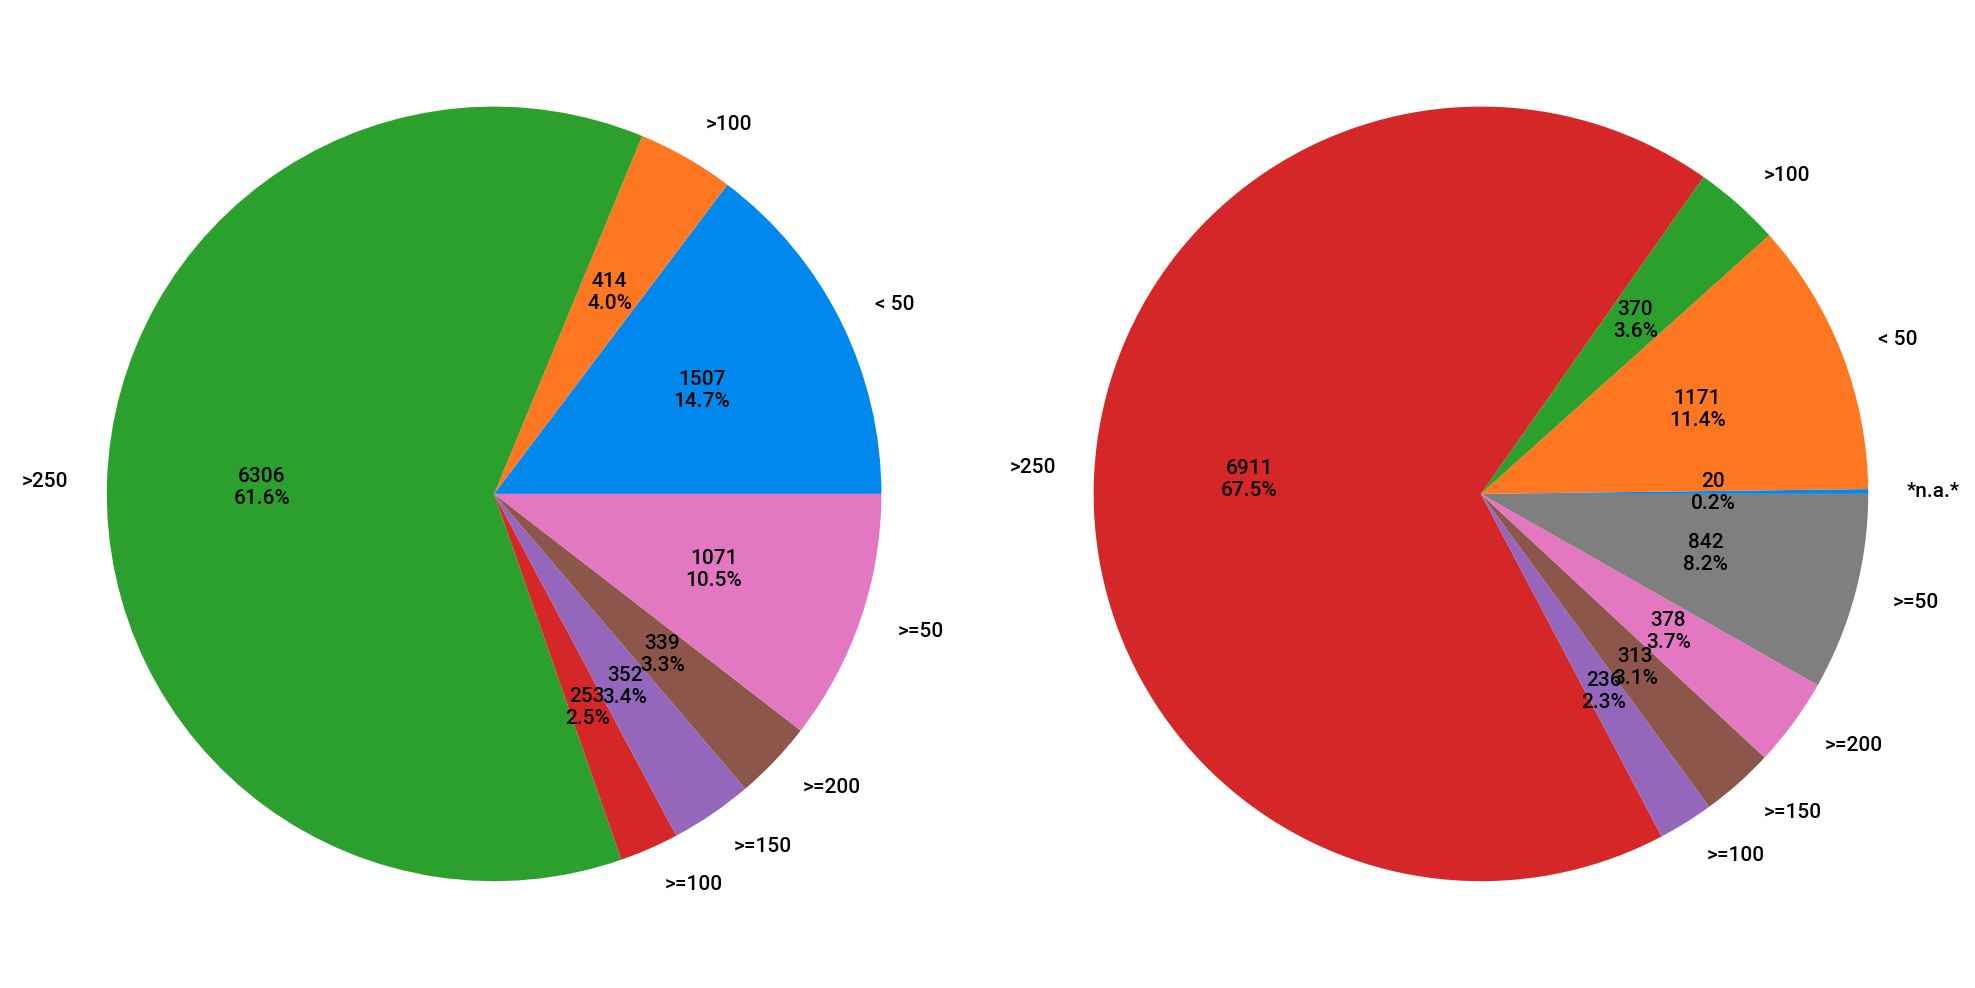

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

df[df.EDUCATION.isin(['высшее', 'Высшее/Второе высшее/Ученая степень', 'второе высшее', 'ученая степень'])].groupby(
    'EMPL_SIZE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15}, ax=ax1, startangle=0)
df[~df.EDUCATION.isin(['высшее', 'Высшее/Второе высшее/Ученая степень', 'второе высшее', 'ученая степень'])].groupby(
    'EMPL_SIZE').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15}, ax=ax2, startangle=0)

ax1.set_ylabel('')
ax2.set_ylabel('')
plt.tight_layout()

Ух ты! У людей без высшего образования на 6 процентов выше доля людей, получающих более 250к в месяц... И зачем, спрашивается, нужно высшее образование?!

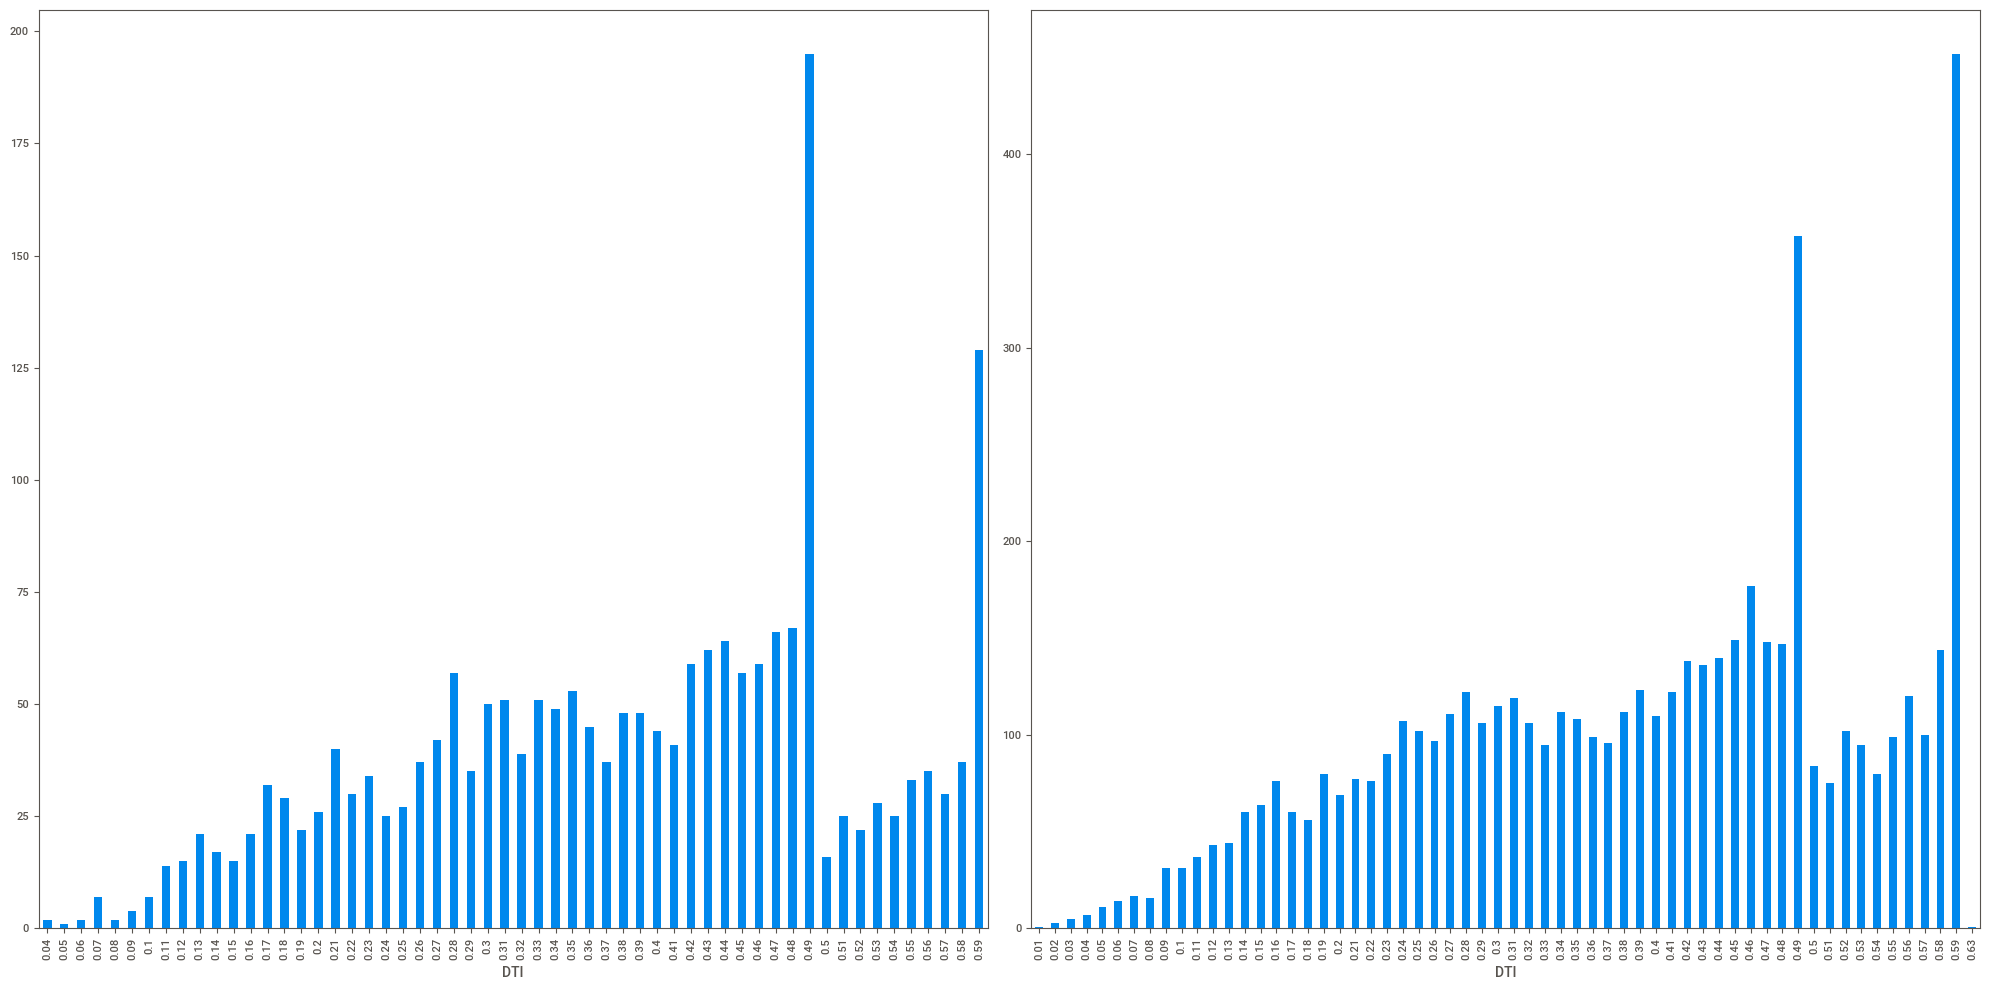

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

df[df.age < 30].groupby('DTI').size().plot(kind='bar', ax=ax1)
df[df.age >= 30].groupby('DTI').size().plot(kind='bar', ax=ax2)

ax1.set_ylabel('')
ax2.set_ylabel('')
plt.tight_layout()

Распределение DTI в зависимости от возраста практически не отличается. Ладно, закончим с категориальными признаками. Напоследок лишь вставим скриншотик из отчёта, на котором для всех пар признаков отмечены коэффицены корреляция Пирсона:

![](Screenshot_2.jpg)

Замечу, что я не смотрел корреляцию между полом клиента и какими-то признаками, потому как это есть в отчёте (для этого я указал колонку SEX как таргет). Существенной корреляции не обнаружено ни с одним из признаков. В целом, выбросов по датасету довольно мало, печалит только большое количество пропущенных значений и сильное доминирование одного или нескольких значений в многих признаках, что может мешать хорошей сегментации. В остальном данные вполне "приятные" - нет отрицательных или сверх больших значений признаков, многие признаки распределены достаточно хорошо

> ## Часть 1.2 - Делаем проверку на некорректные данные

Заменим '*n.a.*' в таблице на Nan, чтобы не обрабатывать такие значения отдельно. И то, и то можно считать пропуском

In [12]:
df = df.replace('*n.a.*', np.nan)

В общем-то, других некорректных данных согласно данным из отчёта не обнаружено

> ## Часть 1.3 - Построение витрины для сегментации

Превратим все признаки в категориальные, выделяя пропуски в отдельную категорию. Так будет проще и меньше вероятность испортить модель, "подмешав" людей с пропусками не в ту категорию.

In [160]:
df_train = df.drop(columns=['ID'])

In [161]:
numerical = df.columns[stats['Процент уникальных значений'] >= 0.5].values
print(numerical)

['ID' 'DTI' 'Period_at_work' 'avg_num_delay' 'Active_to_All_prc'
 'sum_of_paym_months' 'min_MnthAfterLoan' 'max_MnthAfterLoan']


In [162]:
from sklearn import preprocessing

df_train.DTI                = pd.qcut(df_train.DTI, q=10, labels=None)
df_train.Period_at_work     = pd.qcut(df_train.Period_at_work, q=10, labels=None)
df_train.avg_num_delay      = pd.cut(df_train.avg_num_delay, 10, labels=None)
df_train.Active_to_All_prc  = pd.cut(df_train.Active_to_All_prc, 10, labels=None)
df_train.sum_of_paym_months = pd.qcut(df_train.sum_of_paym_months, q=10, labels=None)
df_train.min_MnthAfterLoan  = pd.qcut(df_train.min_MnthAfterLoan, q=10, labels=None)
df_train.max_MnthAfterLoan  = pd.qcut(df_train.max_MnthAfterLoan, q=10, labels=None)

df_train = pd.get_dummies(df_train, columns=df_train.columns, dummy_na=True)
scaled_values = preprocessing.MinMaxScaler().fit_transform(df_train) 
df_train.loc[:,:] = scaled_values

> ## Часть 2.1 - сегментация без учителя

> Воспользуемся алгоритмом без учителя kmeans, чтобы выделить полезные сегменты людей, которые оставили заявки на кредит. Для этого я предварительно сохранил данные и перенёс их на сервер SAS, чтобы после алгоритма сразу получить визуализацию сегментов. 

In [184]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11)
kmeans.fit(df_train)
y_kmeans = kmeans.predict(df_train)
centers = kmeans.cluster_centers_

In [185]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
obj_df = df.copy()
obj_df["INCOME_BASE_TYPE"] = obj_df.INCOME_BASE_TYPE.fillna('не указано')
obj_df["EDUCATION"] = obj_df.EDUCATION.fillna('не указано')
obj_df["FAMILY_STATUS"] = obj_df.FAMILY_STATUS.fillna('не указано')
obj_df["EMPL_SIZE"] = obj_df.EMPL_SIZE.fillna('не указано')
obj_df["EMPL_TYPE"] = obj_df.EMPL_TYPE.fillna('не указано')
obj_df["EMPL_FORM"] = obj_df.EMPL_FORM.fillna('не указано')
obj_df["if_zalog"] = obj_df.if_zalog.fillna('-1')
obj_df["if_zalog"] = obj_df.if_zalog.astype('int')
obj_df["Period_at_work"] = obj_df.Period_at_work.fillna(0)
obj_df["DTI"] = obj_df.DTI.fillna(-0.1)
obj_df["sum_of_paym_months"] = obj_df.sum_of_paym_months.fillna(-0.1)

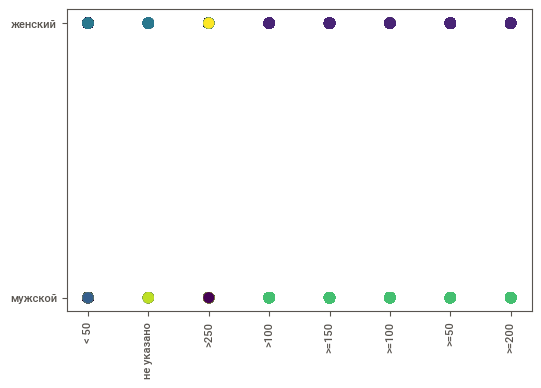

In [189]:
plt.scatter(obj_df['EMPL_SIZE'], obj_df['SEX'], c=y_kmeans, s=50, cmap='viridis')
plt.xticks(rotation=90)
plt.show()

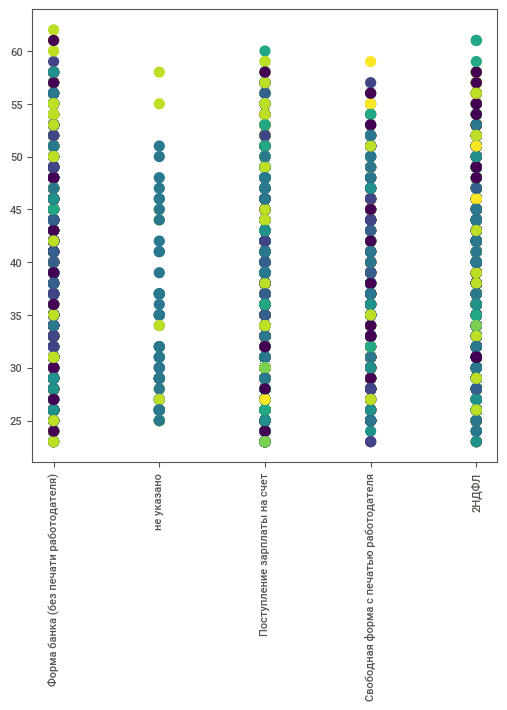

In [186]:
plt.figure(figsize=(6, 6))
plt.scatter(obj_df['INCOME_BASE_TYPE'], obj_df['age'], c=y_kmeans, s=50, cmap='viridis')
plt.xticks(rotation=90)
plt.show()

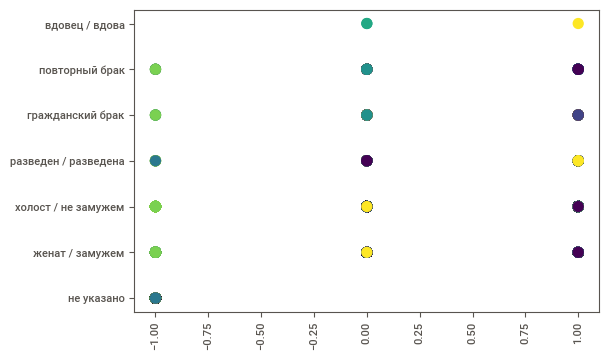

In [187]:
plt.scatter(obj_df['if_zalog'], obj_df['FAMILY_STATUS'], c=y_kmeans, s=50, cmap='viridis')
plt.xticks(rotation=90)
plt.show()

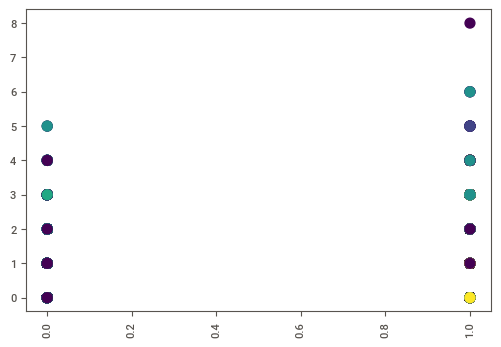

In [188]:
plt.scatter(obj_df['dlq_exist'], obj_df['Active_not_cc'], c=y_kmeans, s=50, cmap='viridis')
plt.xticks(rotation=90)
plt.show()

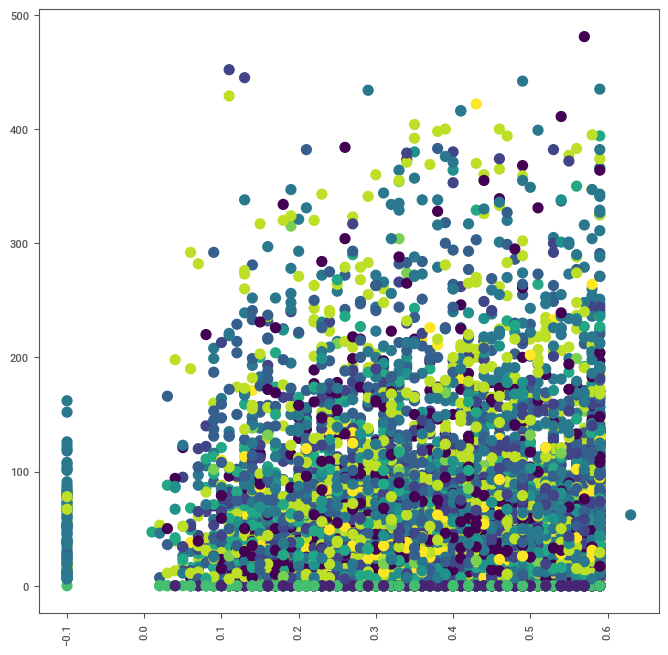

In [190]:
plt.figure(figsize=(8, 8))
plt.scatter(obj_df['DTI'], obj_df['Period_at_work'], c=y_kmeans, s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xticks(rotation=90)
plt.show()

Выше показан результат сегментации 10242 заявок из нашего датасета. Я экспериментировал с различным количеством кластером для алгоритма kmeans, в итоге решил остановиться на 11. При большем числе кластеров модель теряет обобщающую способность, например, на графике с EMPL_SIZE люди с одинаковой зарплатой начинают хаотично относиться к разным кластерам, а при 11 кластерах они всё ещё лежат в одном кластере. Как видно, по некоторым парам признаков разницу в кластерах видно довольно хорошо. По некоторым - не очень.

К сожалению, центры кластеров при таком подходе сложно интерпретируемы, так как все признаки были превращены в численные методом one-hot encoding и словами получится объяснить далеко не все кластеры. Это недостаток данного подхода. Но что можно заметить:

1) Люди хорошо разделились по уровню дохода и полу. По уровню дохода деление такое: отдельно люди с доходом более 250к, отдельно люди с доходом от 50к до 250к и отдельно остальные (менее 50к или не указано). Это вполне хорошие сегменты, ура

2) По возраста люди не разделились, нет явных кластеров. По уровню дохода - отдельно выделяются лишь те, кто его не указал

3) По наличию залога есть хорошее разделение. По семейному положению - не особо. Но забавно, что женатые и холостые люди относятся к одному кластеру:
![](Screenshot_3.jpg)

4) По наличию просрочки на данный момент люди не особо разделились, зато видно разделение по активным кредитным счетам (Active_not_cc)

5) По DTI в отдельную категорию хорошо ложатся только люди, которые его не указали. По Period_at_work возможно и есть некая корреляция между кластерами, но в любом случае много выбросов и не очень информативно

Таким образом, по каким признакам мы можем выделить сегменты на основе этого метода:

1) уровень дохода

2) пол

3) наличие залога

4) семейное положение

5) количество активных кредитных счетов

Но к сожалению данных метод не позволяет провести хорошую интерпретацию этих сегментов :(

Попробуем исправить это во втором методе, которым будет обучением с учителем, а именно дерево решений!

In [194]:
df_train.columns

Index(['INCOME_BASE_TYPE_2НДФЛ', 'INCOME_BASE_TYPE_Поступление зарплаты на счет', 'INCOME_BASE_TYPE_Свободная форма с печатью работодателя', 'INCOME_BASE_TYPE_Форма банка (без печати работодателя)', 'INCOME_BASE_TYPE_nan', 'CREDIT_PURPOSE_Другое', 'CREDIT_PURPOSE_Лечение', 'CREDIT_PURPOSE_Обучение', 'CREDIT_PURPOSE_Отпуск', 'CREDIT_PURPOSE_Покупка автомобиля',
       ...
       'ninety_in_a_year_nan', 'thirty_vintage_0.0', 'thirty_vintage_1.0', 'thirty_vintage_nan', 'sixty_vintage_0.0', 'sixty_vintage_1.0', 'sixty_vintage_nan', 'ninety_vintage_0.0', 'ninety_vintage_1.0', 'ninety_vintage_nan'], dtype='object', length=428)

In [307]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
clf = DecisionTreeClassifier(random_state=179, max_depth=4, min_samples_leaf=100, splitter='random')
drop_columns = [i for i in list(df_train.columns.values) if ('_nan' in i or 'days' in i or 'vintage' in i or 'a_year' in i or '/' in i
                                                             or '_FLAG' in i or 'num_AccountActive' in i or 'INCOME_BASE_TYPE' in i)]
take_columns = [i for i in list(df_train.columns.values) if ('EMPL_SIZE' in i or 'all_credit' in i or #'Period' in i or
                                                             'CREDIT_PUR' in i) and '_nan' not in i]
take_columns.remove('EMPL_SIZE_>=100')
take_columns.remove('EMPL_SIZE_>100')
take_columns.remove('EMPL_SIZE_>=50')
take_columns.remove('EMPL_SIZE_>=200')


#df_model = df_train.drop(columns=['EMPL_FORM_ООО'] + drop_columns)
df_model = df_train[take_columns]
X_train, X_test, y_train, y_test = train_test_split(
    df_model,
    df.INCOME_BASE_TYPE.fillna('не указано'),
    test_size=0.1,
    random_state=727)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(df_model)

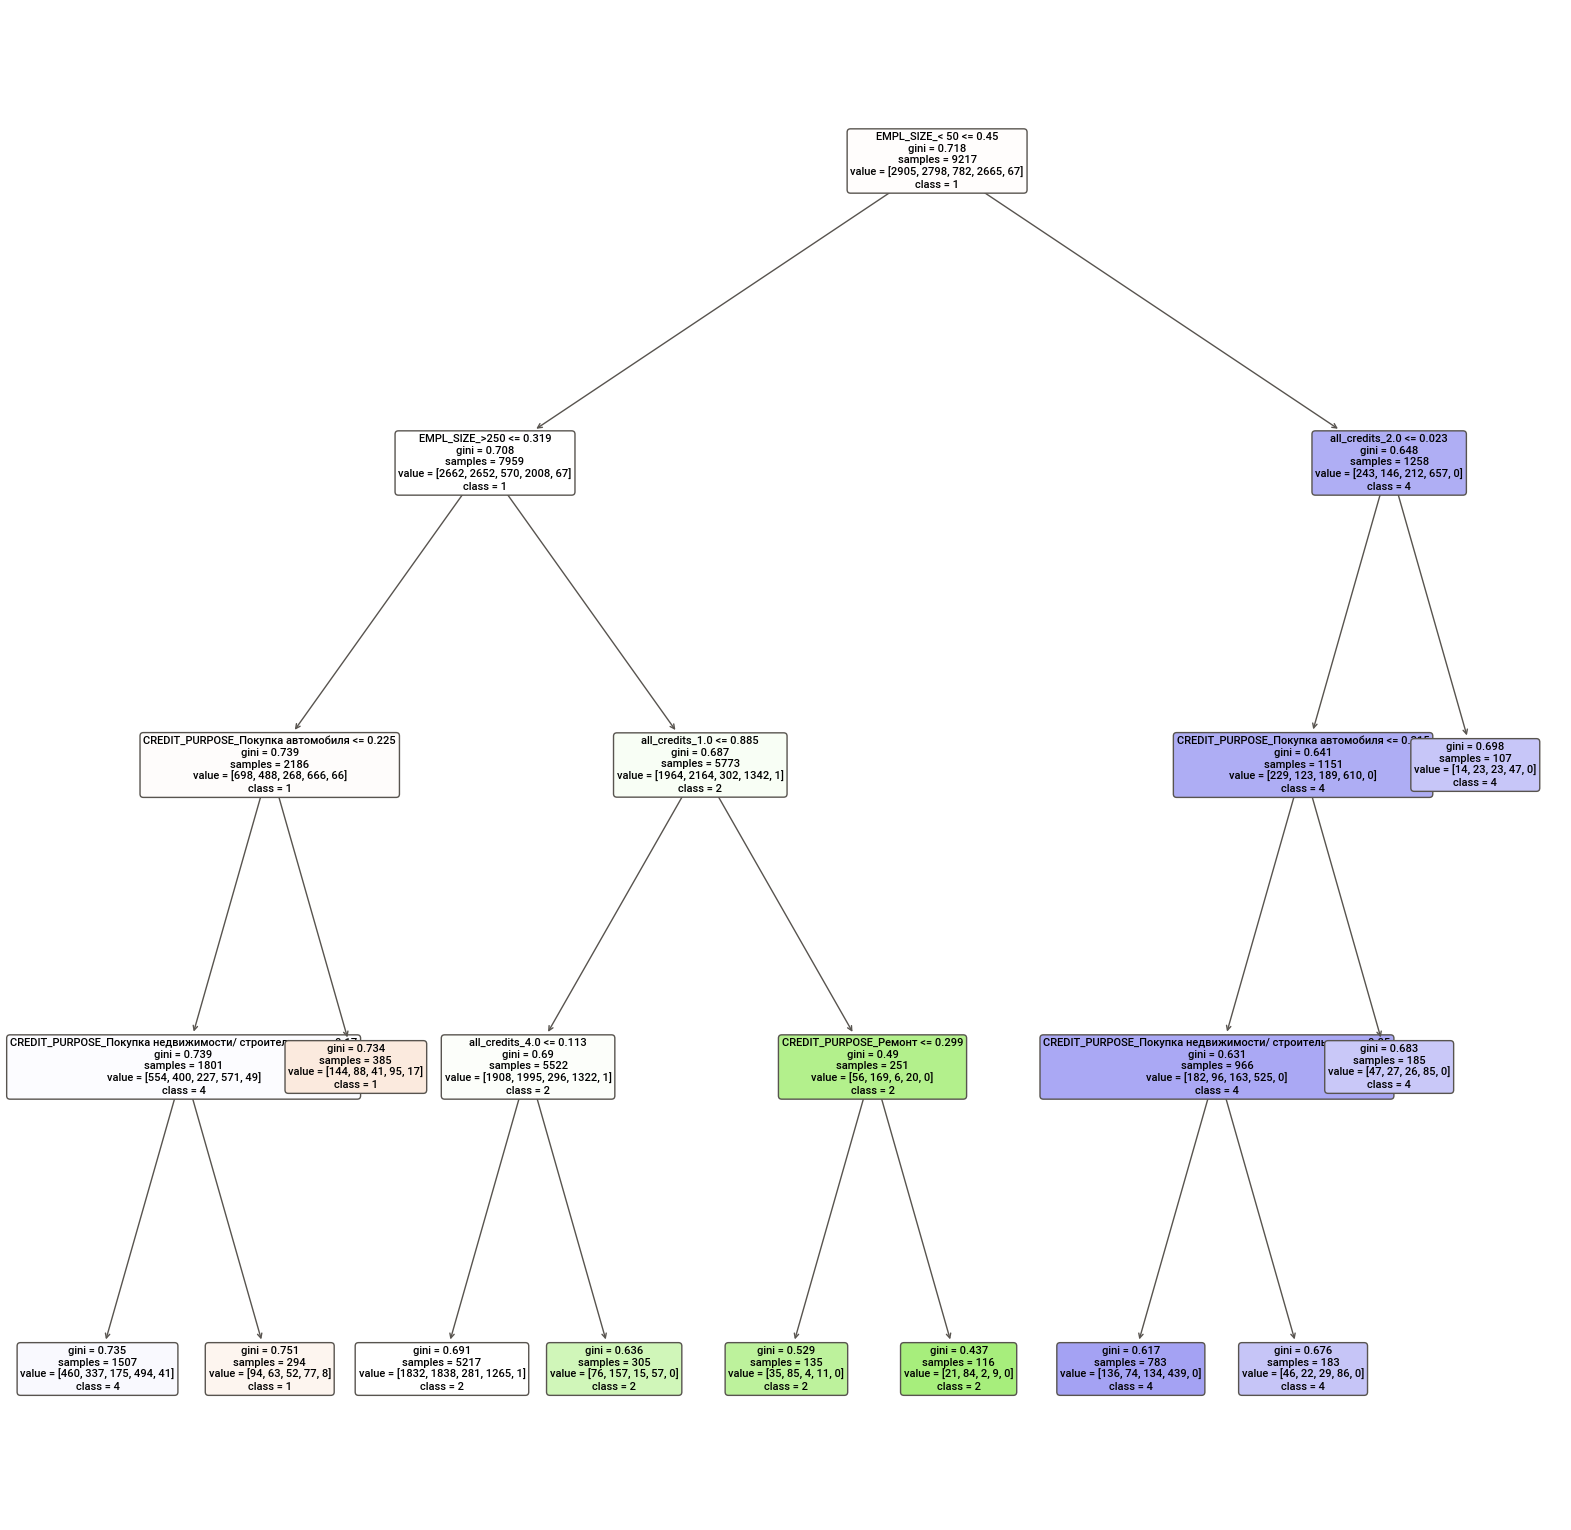

In [308]:
plt.figure(figsize=(20, 20))
from sklearn import tree
tree.plot_tree(clf, feature_names=df_model.columns, filled=True, rounded=True, fontsize=8, class_names=['1', '2', '3', '4'])
plt.show()

В качестве таргета был выбран признак INCOME_BASE_TYPE, так как он распределён довольно равномерно. И перед обучением я оставил в датасете лишь те признаки, которые мне показались полезными. Плюс я ограничил глубину дерева и минимальное количество людей в "листе". Посмотрим, что получилось. Кластеры следующие (слева направо):

1) Люди с доходом от 50 до 250 тысяч, берущие кредит на автомобиль

2) Люди с доходом от 50 до 250 тысяч, берущие кредит на недвижимость

3) Люди с доходом более 250 тысяч и более чем 4 кредитами

4) Люди с доходом более 250 тысяч и менее чем 4 кредитами

5) Люди с доходом более 250 тысяч, более чем 1 кредитом и ремонтом в качестве цели кредита

6) Люди с доходом менее 50 тысяч и более чем 2 кредитами

7) Люди с доходом менее 50 тысяч, менее чем 2 кредитами и автомобилем в качестве цели кредита

8) Люди с доходом менее 50 тысяч, менее чем 2 кредитами и недвижимостью в качестве цели кредита

Как видим, в этот раз с интерпретацией и осмысленностью сегментов всё хорошо, ура

|  | Преимущества | Недостатки |
|-|-|-|
| Kmeans | 1. Можно использовать все признаки для обучения<br><br>2. На данных с ярко выраженными сегментами работает весьма хорошо | 1. Нужно самостоятельно указывать количество кластеров, от которых сильно зависит результат.<br><br>2. Проблемы с интерпретацией результата<br><br>3. Не по всем признакам видно хорошее разделение, могут получаться довольно разрозненные кластеры |
| Дерево решений | 1. Легко и красиво визуализируется<br><br>2. Не требует много вычислительных мощностей<br><br>3. Автоматически выбирает признаки для лучшего деления на каждом шаге| 1. Требует предварительного отбора признаков, которые мы считаем информативными<br><br>2. Некоторые признаки могут использоваться несколько раз или не использоваться вовсе (нужно лучше готовить данные, чтобы этого избежать)<br><br>|